In [8]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys


from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import find_pivots,donchian

C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [9]:
#klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)

start_date = klines_file.split('/')[4].split('_')[3] #Extrae la fecha de inicio
start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
start_date = start_date.replace(hour=0, minute=0, second=0)



,datetime,open,high,low,close,volume,ma_21_12H
1850,2023-07-07 00:00:00,30102.98,30165.64,30062.17,30135.40,1209.27662,30533.870000
1851,2023-07-07 12:00:00,30411.49,30425.69,30312.45,30390.83,1212.53695,30512.288571
1852,2023-07-08 00:00:00,30355.42,30358.72,30272.35,30274.83,385.90795,30502.049524
1853,2023-07-08 12:00:00,30204.99,30222.85,30180.94,30208.00,352.88442,30501.337143
1854,2023-07-09 00:00:00,30301.05,30317.55,30262.22,30287.99,395.64457,30511.807143
1855,2023-07-09 12:00:00,30341.02,30391.12,30274.94,30349.47,921.36391,30499.901905
1856,2023-07-10 00:00:00,30199.99,30240.00,30154.37,30156.17,727.92819,30483.150000
1857,2023-07-10 12:00:00,30310.02,30323.18,30241.16,30312.81,1214.69040,30501.778095
1858,2023-07-11 00:00:00,30483.70,30495.00,30399.18,30476.00,873.74007,30506.853333
1859,2023-07-11 12:00:00,30527.43,30813.63,30480.83,30596.45,3531.92700,30506.791905


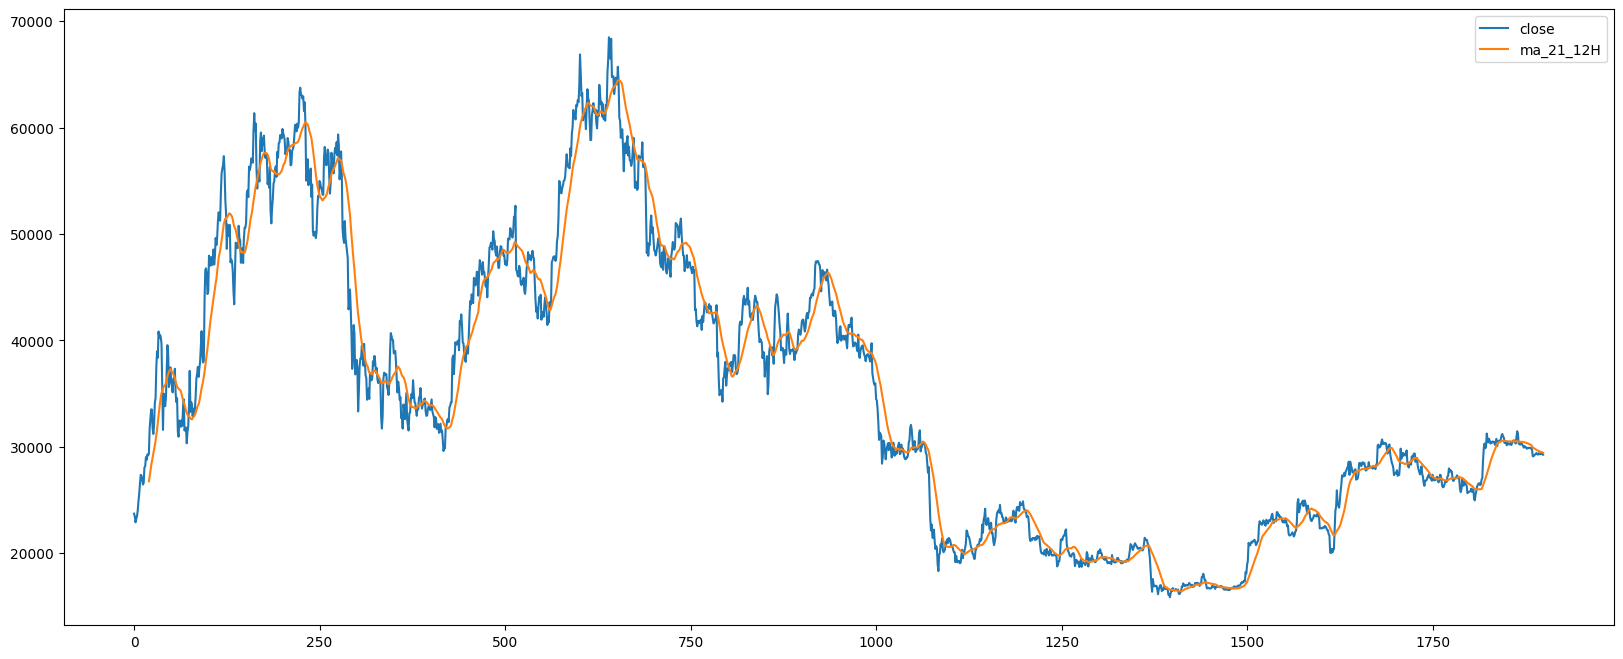

In [10]:
resample = '12H'
ma_period = 21

# Resamplear el dataframe a 1 dia
dfD = df.resample(resample, on="datetime").agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

# Calcular la media movil simple de 21 periodos
ma_col = f'ma_{ma_period}_{resample}'

dfD[ma_col] = dfD['close'].rolling(window=21).mean()

# Asociar los valores de la media movil al dataframe original
df = pd.merge(df, dfD[ma_col], on='datetime')#,how='left'
df[['close',ma_col]].plot(figsize=(20,8))
df.tail(50)
